# IMPORT LIBRARIES AND DATASETS

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [18]:
# read the csv file 
insurance_df=pd.read_csv('insurance.csv')

In [19]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# PERFORMING EXPLORATORY DATA ANALYSIS

In [21]:
insurance_df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


<Axes: >

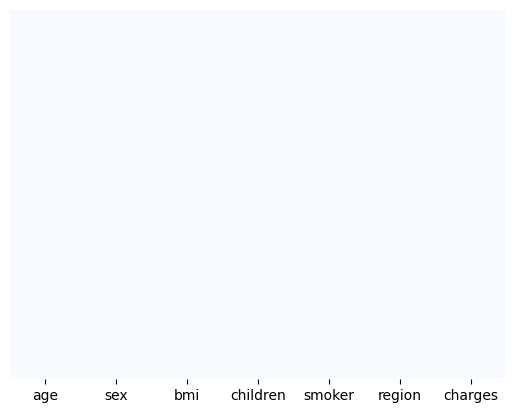

In [22]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [23]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
# Check the dataframe info
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [26]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
#df_region=insurance_df.groupby(by="region").mean()
#df_region

# PERFORMING FEATURE ENGINEERING

In [27]:
# Check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [28]:
# convert categorical variable to numerical
insurance_df['sex']= insurance_df['sex'].apply(lambda x:0 if x=='female' else 1)

In [29]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [30]:
# Check the unique values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [31]:
# Convert categorical variable to numerical 
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [32]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [33]:
# Check unique values in 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [34]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)


In [35]:
region_dummies

,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False
...,...,...,...
1333,True,False,False
1334,False,False,False
1335,False,True,False
1336,False,False,True


In [36]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)

In [37]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,False,False,True
1,18,1,33.770,1,0,southeast,1725.55230,False,True,False
2,28,1,33.000,3,0,southeast,4449.46200,False,True,False
3,33,1,22.705,0,0,northwest,21984.47061,True,False,False
4,32,1,28.880,0,0,northwest,3866.85520,True,False,False


In [38]:
# Let's drop the original 'region' column 
insurance_df.drop(['region'], axis = 1, inplace = True)


In [39]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


# PERFORMING DATA VISUALIZATION

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

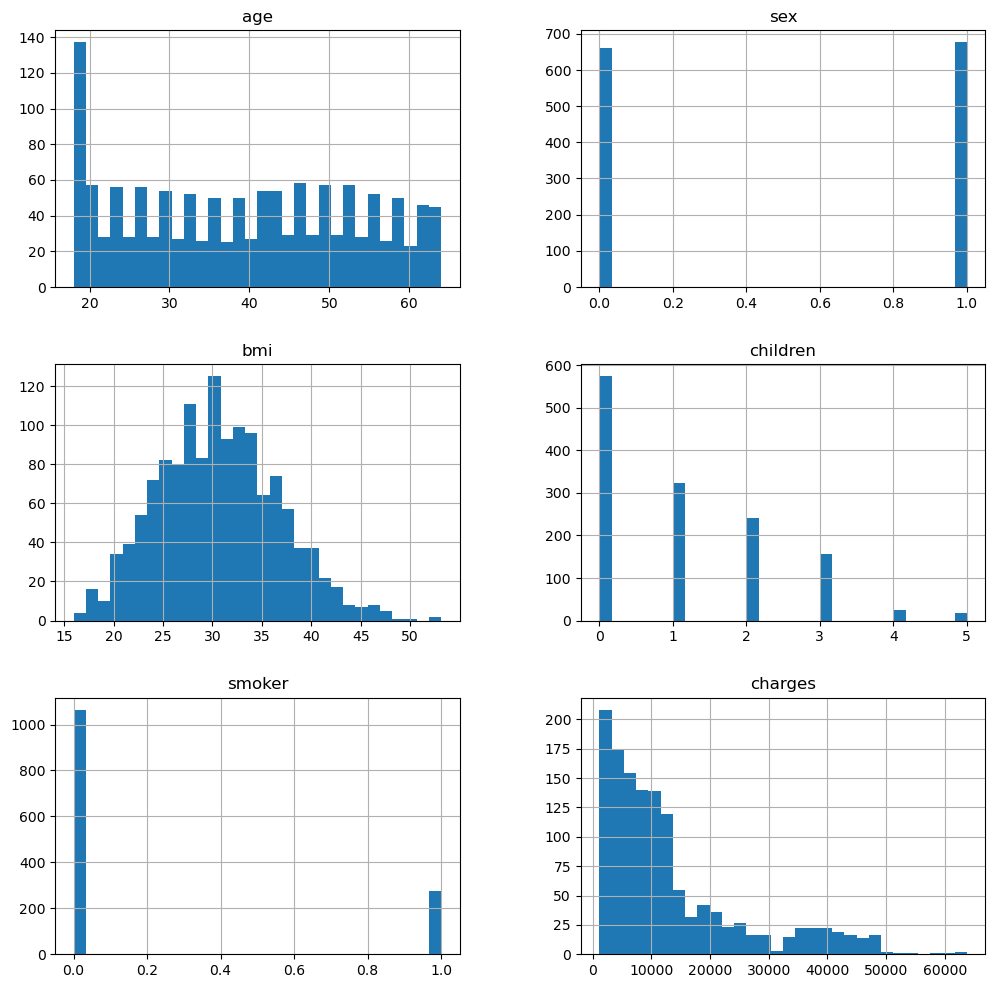

In [40]:
insurance_df[['age','sex','bmi','children','smoker','charges'] ].hist(bins=30,figsize=(12,12))

In [41]:
# plot pairplot
sns.pairplot


<function seaborn.axisgrid.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

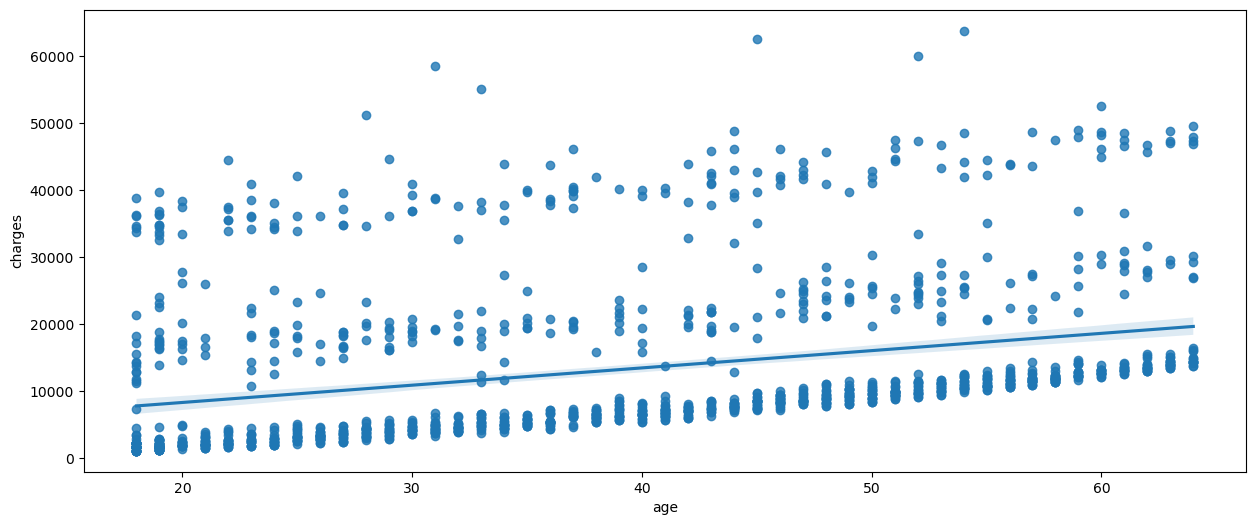

In [42]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()
  

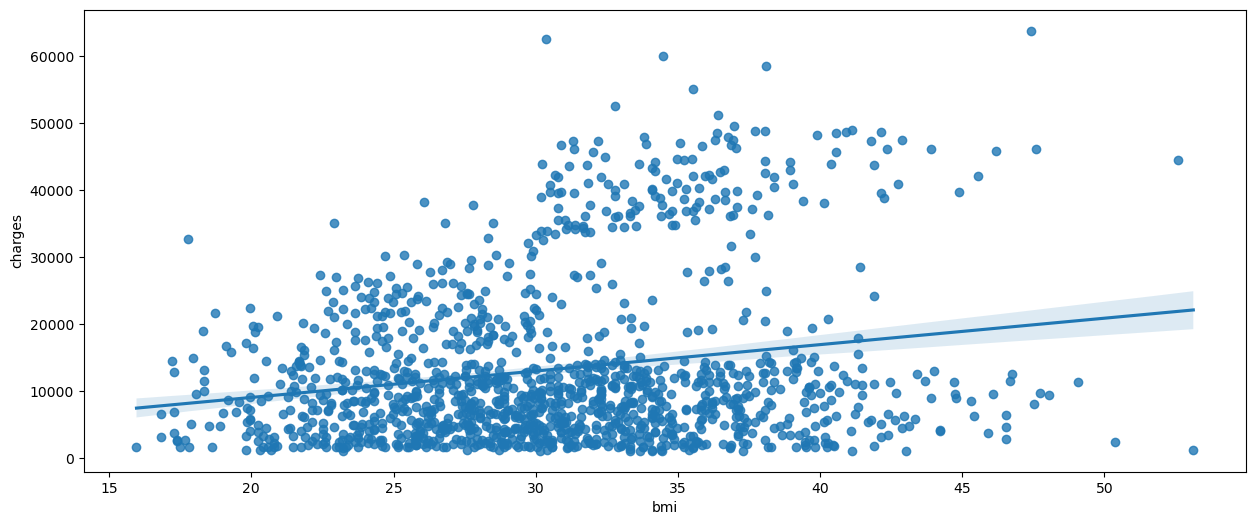

In [43]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()
  

# CREATE TRAINING AND TESTING DATASET

In [44]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [45]:
X=insurance_df.drop(columns=['charges'])
y = insurance_df['charges']

In [46]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,False,False,True
1,18,1,33.770,1,0,False,True,False
2,28,1,33.000,3,0,False,True,False
3,33,1,22.705,0,0,True,False,False
4,32,1,28.880,0,0,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,True,False,False
1334,18,0,31.920,0,0,False,False,False
1335,18,0,36.850,0,0,False,True,False
1336,21,0,25.800,0,0,False,False,True


In [47]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [48]:
X.shape

(1338, 8)

In [49]:
y.shape

(1338,)

In [50]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [51]:
y = y.reshape(-1,1)

In [52]:
# Only take the numerical variables and scale them
X 

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [53]:
y.shape

(1338, 1)

In [54]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)


# TRAIN AND EVALUATE A LINEAR REGRESSION MODEL IN SCIKIT-LEARN

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [56]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
regression_model_sklearn=LinearRegression()
regression_model_sklearn.fit(X_train,y_train)


LinearRegression()

In [57]:
regresssion_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.7371781711407581

In [58]:
y_predict = regression_model_sklearn.predict(X_test)

In [59]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)


In [60]:
k = X_test.shape[1]
n = len(X_test)
#no. of columns in dataframe
k

8

In [61]:
n

268

In [62]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6034.954 
MSE = 36420668.0 
MAE = 4190.8213 
R2 = 0.7371781960162442 
Adjusted R2 = 0.729060148016746
